In [1]:
import matplotlib.pyplot as plt
from firedrake import *

In [2]:
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)
u = TrialFunction(V)
v = TestFunction(V)


x, y = SpatialCoordinate(mesh)
f = (1 + 8*pi*pi)*cos(2*pi*x)*cos(2*pi*y)

a = (dot(grad(v), grad(u)) + v * u) * dx
L = f * v * dx

uh = Function(V)

solve(a == L, uh, solver_parameters={'ksp_type': 'cg', 'pc_type': 'none'})

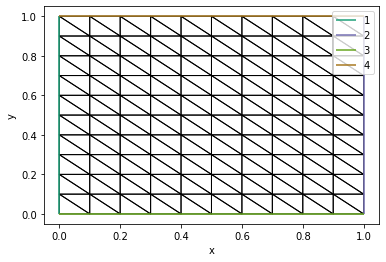

In [4]:
fig, axes = plt.subplots()
triplot(mesh, axes=axes)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend();

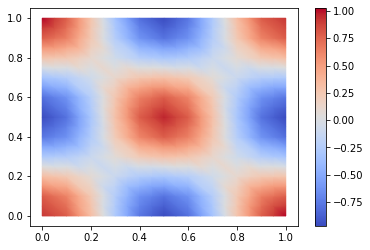

In [5]:
fig, axes = plt.subplots()
collection = tripcolor(uh, axes=axes, cmap='coolwarm')
fig.colorbar(collection);

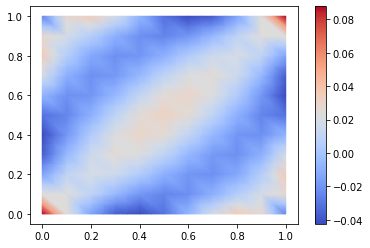

In [6]:
u_exact = cos(2*pi*x)*cos(2*pi*y)
difference = assemble(interpolate(u_exact, V) - uh)
fig, axes = plt.subplots()
collection = tripcolor(difference, axes=axes, cmap='coolwarm')
fig.colorbar(collection);

# Excercise 1

### 1a Use a Higher Approximation Degree
Solve the same problem, only this time, use a piecewise quadratic approximation space.

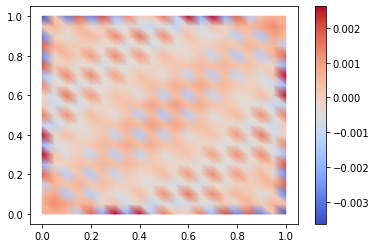

In [7]:
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 2)
u = TrialFunction(V)
v = TestFunction(V)

x, y = SpatialCoordinate(mesh)
f = (1 + 8*pi*pi)*cos(2*pi*x)*cos(2*pi*y)

a = (dot(grad(v), grad(u)) + v * u) * dx
L = f * v * dx

uh = Function(V)
solve(a == L, uh, solver_parameters={'ksp_type': 'cg', 'pc_type': 'none'})

u_exact = cos(2*pi*x)*cos(2*pi*y)
difference = assemble(interpolate(u_exact, V) - uh)
fig, axes = plt.subplots()
collection = tripcolor(difference, axes=axes, cmap='coolwarm')
fig.colorbar(collection);

### 1b use a quafrialteral mesh
Solve the same problem, but using quadrilateral, rather than triangular, cells.

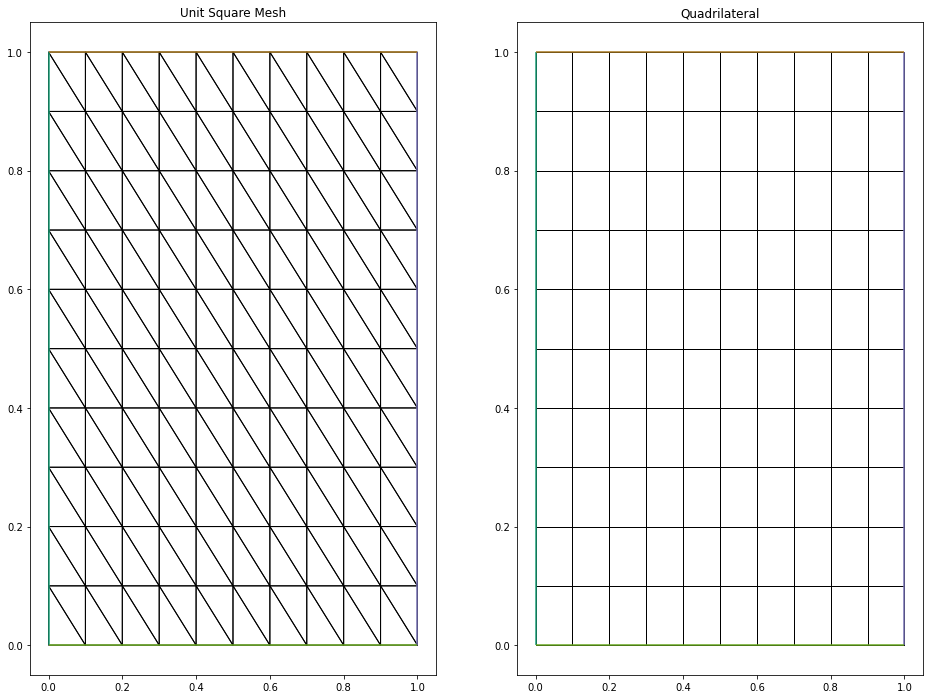

In [13]:
mesh_old = UnitSquareMesh(10, 10)
mesh = UnitSquareMesh(10, 10, quadrilateral=True)
fig, axes = plt.subplots(1, 2, figsize=(16, 12))
triplot(mesh_old, axes=axes[0])
triplot(mesh, axes=axes[1])
axes[0].set_title('Unit Square Mesh')
axes[1].set_title('Quadrilateral')
plt.show()

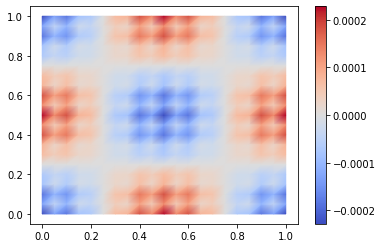

In [15]:
V = FunctionSpace(mesh, "Q", 2)
u = TrialFunction(V)
v = TestFunction(V)

x, y = SpatialCoordinate(mesh)
f = (1 + 8*pi*pi)*cos(2*pi*x)*cos(2*pi*y)

a = (dot(grad(v), grad(u)) + v * u) * dx
L = f * v * dx

uh = Function(V)
solve(a == L, uh, solver_parameters={'ksp_type': 'cg', 'pc_type': 'none'})

u_exact = cos(2*pi*x)*cos(2*pi*y)
difference = assemble(interpolate(u_exact, V) - uh)
fig, axes = plt.subplots()
collection = tripcolor(difference, axes=axes, cmap='coolwarm')
fig.colorbar(collection);

# Exercise 2: Converge of the method

i: 0, j: 0
i: 0, j: 1
i: 0, j: 2
i: 1, j: 0
i: 1, j: 1
i: 1, j: 2
i: 2, j: 0
i: 2, j: 1
i: 2, j: 2


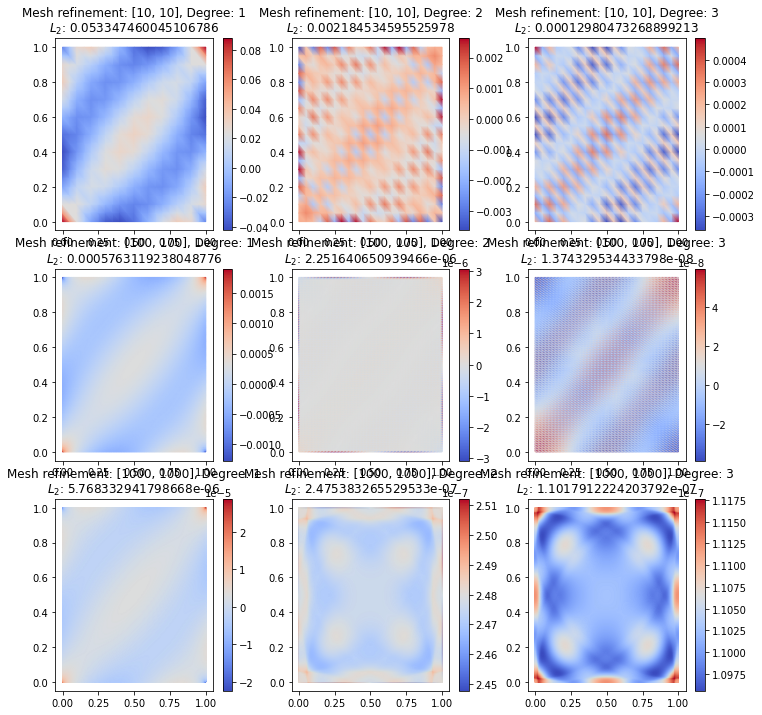

In [5]:
refinement = [[10, 10], [100, 100], [1000, 1000]]
degree_list = [1, 2, 3]

fig, ax = plt.subplots(len(refinement), len(degree_list), figsize=(12, 12))

for i in range(len(refinement)):
    for j in range(len(degree_list)):

        print(f'i: {i}, j: {j}')

        mesh_res = refinement[i]
        d = degree_list[j]

        mesh = UnitSquareMesh(mesh_res[0], mesh_res[1])
        V = FunctionSpace(mesh, "Lagrange", d)
        u = TrialFunction(V)
        v = TestFunction(V)
        x, y = SpatialCoordinate(mesh)
        f = (1 + 8*pi*pi)*cos(2*pi*x)*cos(2*pi*y)
        a = (dot(grad(v), grad(u)) + v * u) * dx
        L = f * v * dx

        uh = Function(V)
        solve(a == L, uh, solver_parameters={'ksp_type': 'cg',
                                            'pc_type': 'none'})

        u_exact = cos(2*pi*x)*cos(2*pi*y)
        L2 = sqrt(assemble(dot(uh - u_exact, uh- u_exact) * dx))
        difference = assemble(interpolate(u_exact, V) - uh)
        collection = tripcolor(difference, axes=ax[i, j], cmap='coolwarm')
        ax[i, j].set_title(f'Mesh refinement: {mesh_res}, Degree: {d}\n' + r'$L_2$: ' + f'{L2}')
        fig.colorbar(collection, ax=ax[i, j]);

plt.show()


# Inhomogenous Neumann BC

In [5]:


mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)
u = TrialFunction(V)
v = TestFunction(V)
x, y = SpatialCoordinate(mesh)
f = (1 + 8*pi*pi)*cos(2*pi*x)*cos(2*pi*y)
a = (dot(grad(v), grad(u)) + v * u) * dx



g = Constant(1)
L = f*v*dx + g*v*ds(1)


uh = Function(V)
solve(a == L, uh, solver_parameters={'ksp_type': 'cg', 'pc_type': 'none'})

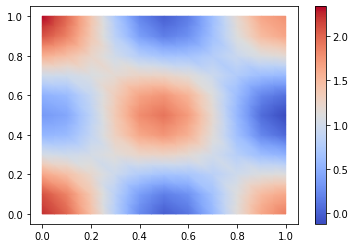

In [6]:
fig, axes = plt.subplots()
collection = tripcolor(uh, axes=axes, cmap='coolwarm')
fig.colorbar(collection);